# Supervised Learning: Classification

## Using Decision Tree Model in scikit-learn

### Acknowledgements: Usman Alim 



Further Reading:

* `scikit-learn`: [user guide](https://scikit-learn.org/stable/user_guide.html).
* `The Iris Flower dataset`: [description](https://archive.ics.uci.edu/ml/datasets/iris). # it's a classic one to use for ML
* `Decision Tree` is a model used in supervised learning: [documentation](https://scikit-learn.org/stable/modules/tree.html).


## Quick Overview of scikit-learn

- [`scikit-learn`](https://scikit-learn.org/stable/) is the main machine learning library in the Python data science ecosystem.
- Implements many supervised (classification, regression) and unsupervised (clustering, density estimation, dimensionality reduction) learning algorithms.
- Relies heavily on `numpy`. Inputs and outputs are numpy arrays.
- Input data are expected to be $n \times D$ numerical arrays where $n$ is the number of observations, and $D$ is the number of features.
- Some feature wrangling may be needed, provides methods for feature extraction. 

# Predicting Iris Flowers
- Goal is to train a machine learning model (in this case, the decision tree model) to recognize types of iris flowers
- The dataset has three types of iris flowers: Iris Setosa, Iris Versicolour, Iris Virginica
- There are 150 examples in the dataset, and we will use a portion of it for training the model, and the rest for testing model accuracy

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [273]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [275]:
# # load the dataset from the url into pandas dataframe
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'label']
data = pd.read_csv('train.csv')

display(dataframe)

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


In [276]:
# Data cleaning
p_data = pd.DataFrame(columns=['Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type'])
p_data = p_data.append(data)

C:\Users\faii_\AppData\Local\Temp\ipykernel_10496\3839881012.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_data = p_data.append(data)


In [56]:
# p_data['Tweet'] = data['Tweet'].str.replace('[^a-zA-Z]', ' ')
# p_data

In [55]:
# p_data['Tweet'] = p_data['Tweet'].apply(lambda x: x.lower())
# p_data

In [277]:
from nltk.stem import SnowballStemmer
import string

stopwords = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
# data['Tweet'] = p_data['Tweet'].apply(word_tokenize)

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in text.split() if word not in stopwords]
    return ' '.join(words)

p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)

In [54]:
# # Stop word removal
# stop_words = stopwords.words('english')
# p_data['Tweet'] = p_data['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])
# data

In [278]:
p_data

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7,preprocessed_text
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN,good morn love leebrownv
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN,realdonaldtrump usnavi rip hero
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN,havent follow news understand eff dumbest thing
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN,pictwittercomdy9q4ftlhz paper scissor glue htt...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN,didyouknow ► mahatma gandhi made brief visit l...
...,...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN,allwentwrongwhen told hair stylist go nut
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN,dont like dont care
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN,miami graham nash live parker playhous local
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN,bethannhamilton busi oneup good


In [279]:
p_data = p_data.drop(p_data.columns[7], axis=1)
p_data = p_data[p_data['Type'] != 'South Dakota']
p_data

,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,good morn love leebrownv
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,realdonaldtrump usnavi rip hero
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,havent follow news understand eff dumbest thing
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,pictwittercomdy9q4ftlhz paper scissor glue htt...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,didyouknow ► mahatma gandhi made brief visit l...
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,allwentwrongwhen told hair stylist go nut
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,dont like dont care
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,miami graham nash live parker playhous local
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,bethannhamilton busi oneup good


In [362]:
# Get the feature('Tweet') and lable ('Type') data from a Training and Test dataset
# We use 60% of the dataset to train a model, and use the rest to test the model predictions

X_train, X_test, y_train, y_test = train_test_split(p_data['preprocessed_text'], p_data['Type'], test_size=.40)

In [363]:
# Initialize the vectorizer with desired parameters
vectorizer = CountVectorizer(max_features=1000)


# Fit and transform the preprocessed text
vectorized_tweet_train = vectorizer.fit_transform(X_train)
vectorized_tweet_test = vectorizer.transform(X_test)

In [367]:
# Train a Naive Bayes classifier on the vectorized text
nb = MultinomialNB()
nb.fit(vectorized_tweet_train, y_train)


# score = nb.score(vectorized_tweet_test, y_test)
# print("Accuracy: {:.2f}%".format(score * 100))

TypeError: fit() got an unexpected keyword argument 'epochs'

In [365]:
# Use the trained classifier to make predictions on the vectorized new text data
pred_labels = nb.predict(vectorized_tweet_test)


In [366]:
# Compute the accuracy score of the predicted labels
accuracy = accuracy_score(y_test, pred_labels)

print(pred_labels)

print("Accuracy: ", accuracy_score(y_test, pred_labels) * 100)

['Spam' 'Quality' 'Quality' ... 'Quality' 'Quality' 'Quality']
Accuracy:  74.4755831515355


In [341]:
score = nb.score(vectorized_tweet_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))

Accuracy: 72.83%


# Visualizing the results

- We can visualize the results using a confusion matrix
- The confusion matrix tells us exactly how many of each type of flowers the model predicted and what the correct answers are

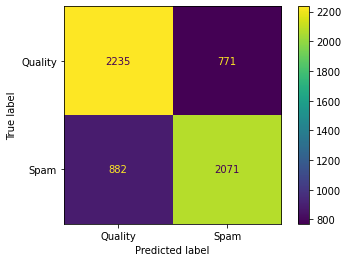

In [310]:
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

plt.show()

In [315]:
# read the Test data

unseen_data = pd.read_csv('test.csv')

#  add Type column to store predicted values and process the tweet data.

unseen_data['Type'] = ' '
unseen_data['preprocessed_text'] = unseen_data['Tweet'].apply(preprocess_text)

unSeen_X_test = unseen_data['preprocessed_text']
v_unseen_tweet = vectorizer.transform(unSeen_X_test)

unseen_data


,Id,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,0,"Cops shoot blacks almost everyday, and there a...",5509.0,5977.0,8062.0,1,ですpacito,,cop shoot black almost everyday still peopl de...
1,1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ...",0.0,0.0,NaN,0,NaN,,happytaeyangday oppahappi birthday pictwitterc...
2,2,RT @HoneyBadger10: Panthers in the super bowl....,471.0,229.0,747.0,0,"B'klyn, NYC, LA",,rt honeybadger10 panther super bowl black pant...
3,3,Sorry my Twitter keeps posting my retweets a m...,0.0,79800.0,48.0,0,NaN,,sorri twitter keep post retweet million time
4,4,Heart attack causes and symptoms are different...,902.0,5797.0,4270.0,0,Chicago,,heart attack caus symptom differ women health
...,...,...,...,...,...,...,...,...,...
780,780,New Project For NLex Please @DreamscapePH @abs...,0.0,0.0,0.0,0,NaN,,new project nlex pleas dreamscapeph abscbndotc...
781,781,Actor DiCaprio joins growing movement to dives...,8753.0,12323.0,9023.0,0,United States,,actor dicaprio join grow movement divest fossi...
782,782,Just overheard 'looping in' 'reaching out' and...,45.0,49.0,60.0,1,United Kingdom,,overheard loop reach super excit sentenc
783,783,Photoshoot time! #music #band #photoshootpic.t...,0.0,0.0,0.0,0,"Southampton, England",,photoshoot time music band photoshootpictwitte...


# Fill in missing labels

- If we have a new example with no label, or an existing example with missing label, We can use the trained model to predict the label for this example

In [75]:
# # use the model to make predictions on the test data
# print("Predicting labels of the test data set - %i examples" % (len(X_test)))
# Y_pred = clf.predict(X_test)

# print(Y_pred)

# print("Accuracy: ", accuracy_score(Y_test, Y_pred))


In [319]:
pred_labels_2 = nb.predict(v_unseen_tweet)

One thing to note is that there are random elements in this entire process.
- When splitting the dataset into training and test, the split is random, so the examples used to train the model are different each time you run
- The training of the model itself also contains random elements

You may run this notebook a few times and observe how the results change each time. This is the reason in machine learning, you would never just train your model once and report the accuracy. You may have gotten lucky that one time!

In [320]:
unseen_data['Type'] = pred_labels_2

In [318]:
unseen_data

,Id,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,0,"Cops shoot blacks almost everyday, and there a...",5509.0,5977.0,8062.0,1,ですpacito,Spam,cop shoot black almost everyday still peopl de...
1,1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ...",0.0,0.0,NaN,0,NaN,Quality,happytaeyangday oppahappi birthday pictwitterc...
2,2,RT @HoneyBadger10: Panthers in the super bowl....,471.0,229.0,747.0,0,"B'klyn, NYC, LA",Spam,rt honeybadger10 panther super bowl black pant...
3,3,Sorry my Twitter keeps posting my retweets a m...,0.0,79800.0,48.0,0,NaN,Quality,sorri twitter keep post retweet million time
4,4,Heart attack causes and symptoms are different...,902.0,5797.0,4270.0,0,Chicago,Spam,heart attack caus symptom differ women health
...,...,...,...,...,...,...,...,...,...
780,780,New Project For NLex Please @DreamscapePH @abs...,0.0,0.0,0.0,0,NaN,Quality,new project nlex pleas dreamscapeph abscbndotc...
781,781,Actor DiCaprio joins growing movement to dives...,8753.0,12323.0,9023.0,0,United States,Spam,actor dicaprio join grow movement divest fossi...
782,782,Just overheard 'looping in' 'reaching out' and...,45.0,49.0,60.0,1,United Kingdom,Quality,overheard loop reach super excit sentenc
783,783,Photoshoot time! #music #band #photoshootpic.t...,0.0,0.0,0.0,0,"Southampton, England",Quality,photoshoot time music band photoshootpictwitte...


In [321]:
# Compute the accuracy score of the predicted labels
accuracy_unSeen_tweet = accuracy_score(y_test, pred_labels_2)

print(pred_labels_2)

print("Accuracy: ", accuracy_score(y_test, pred_labels_2) * 100)

ValueError: Found input variables with inconsistent numbers of samples: [5959, 785]